In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import sys

ImportError: cannot import name 'Literal' from 'typing' (c:\Users\Yaslly\miniconda3\lib\typing.py)

In [ ]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
len(data)

891

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin parece não ser importante. É só um dado textual de número da cabine

Devemos remover as linhas que possuem NaN em Embarked pois são poucas.

E Age parece ser um atributo importante, então vamos remover as linhas com NaN

In [ ]:
df = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)

In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
len(df)

712

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


Label Encoding -> transformar dados textuais em categorias

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelenconder = LabelEncoder()

In [ ]:
df['Sex_encoded'] = labelenconder.fit_transform(df['Sex'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Sex          712 non-null    object 
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked     712 non-null    object 
 8   Sex_encoded  712 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 52.8+ KB


In [ ]:
df['Embarked'] = df['Embarked'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     712 non-null    int64   
 1   Pclass       712 non-null    int64   
 2   Sex          712 non-null    object  
 3   Age          712 non-null    float64 
 4   SibSp        712 non-null    int64   
 5   Parch        712 non-null    int64   
 6   Fare         712 non-null    float64 
 7   Embarked     712 non-null    category
 8   Sex_encoded  712 non-null    int32   
dtypes: category(1), float64(2), int32(1), int64(4), object(1)
memory usage: 48.1+ KB


In [ ]:
df['Embarked_encoded'] = df['Embarked'].cat.codes
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_encoded
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,2
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,0,1
886,0,2,male,27.0,0,0,13.0000,S,1,2
887,1,1,female,19.0,0,0,30.0000,S,0,2
889,1,1,male,26.0,0,0,30.0000,C,1,0


In [ ]:
df['Age_cat']=pd.cut(data['Age'],  bins=[0, 18, 60, sys.maxsize], labels=[0, 1, 2])

In [ ]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_encoded,Age_cat
0,0,3,male,22.0,1,0,7.2500,S,1,2,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,1
2,1,3,female,26.0,0,0,7.9250,S,0,2,1
3,1,1,female,35.0,1,0,53.1000,S,0,2,1
4,0,3,male,35.0,0,0,8.0500,S,1,2,1


In [ ]:
df['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [ ]:
y = df['Survived'].to_list()
# y

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Sex_encoded', 'Embarked_encoded', 'Age_cat'],
      dtype='object')

In [ ]:
# X = df[[ 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_encoded', 'Embarked_encoded']]
X = df[[ 'Pclass', 'SibSp', 'Parch', 'Sex_encoded', 'Embarked_encoded','Age_cat']]
X.head()

,Pclass,SibSp,Parch,Sex_encoded,Embarked_encoded,Age_cat
0,3,1,0,1,2,1
1,1,1,0,0,0,1
2,3,0,0,0,2,1
3,1,1,0,0,2,1
4,3,0,0,1,2,1


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.9, random_state=1) #30% para teste e 70% para treinamento

In [ ]:
X_train

,Pclass,SibSp,Parch,Sex_encoded,Embarked_encoded,Age_cat
165,3,0,2,1,2,0
447,1,0,0,1,2,1
49,3,1,0,0,2,0
634,3,3,2,0,2,0
796,1,0,0,0,2,1
...,...,...,...,...,...,...
182,3,4,2,1,2,0
809,1,1,0,0,2,1
94,3,0,0,1,2,1
292,2,0,0,1,0,1


In [ ]:
len(X_train)

640

In [ ]:
len(X_test)

72

In [ ]:
len(X_train)+len(X_test)

712

In [ ]:
len(y_train)

640

In [ ]:
len(y_test)

72

##  Inicializar classificador

In [ ]:
clf = KNeighborsClassifier(n_neighbors=7)

## Treinamento

In [ ]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

## Classificação/Predição

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1])

In [ ]:
# y_test

## Avaliação dos resultados

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.75

Para k=5, acurácia de 76%.

Para k=7, acurácia de 74%

Para k=5 e age transformado para 3 categorias, a acurácia foi de 78%.

Para k=7 e age transformado para 3 categorias, a acurácia foi de 82%.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

In [ ]:
cm

array([[34,  6],
       [12, 20]], dtype=int64)

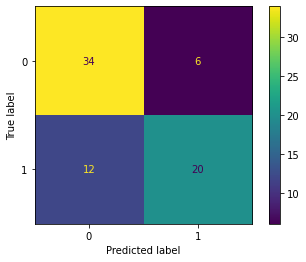

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

88 pessoas no conjunto de dados de **teste** que sobreviveram

das 88 pessoas que sobreviveram, nosso modelo diz que 52 sobreviveram. Nosso modelo diz que 36 pessoas não sobreviveram, porém elas sobreviveram.

In [ ]:
36+52

88

In [ ]:
(108+52)/(108+36+18+52)

0.7476635514018691

In [ ]:
from sklearn.metrics import recall_score,precision_score, f1_score, classification_report

In [ ]:
recall_score(y_test,y_pred)

0.625

In [ ]:
precision_score(y_test,y_pred)

0.7692307692307693

In [ ]:
f1_score(y_test,y_pred)

0.6896551724137931

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        40
           1       0.77      0.62      0.69        32

    accuracy                           0.75        72
   macro avg       0.75      0.74      0.74        72
weighted avg       0.75      0.75      0.75        72



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(clf, X, y, cv=10)

In [ ]:
scores

array([0.80555556, 0.77777778, 0.77464789, 0.81690141, 0.8028169 ,
       0.81690141, 0.83098592, 0.76056338, 0.81690141, 0.85915493])

In [ ]:
print(f"Resultado usando k-fold: {scores.mean()} +- {scores.std()}")

Resultado usando k-fold: 0.8062206572769952 +- 0.027676781946320034


In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(clf, X, y, scoring=['accuracy','f1','recall'],cv=10)
scores

{'fit_time': array([0.00398898, 0.0019927 , 0.00199652, 0.00199795, 0.00249958,
        0.00199413, 0.00299168, 0.00199509, 0.0020082 , 0.00199342]),
 'score_time': array([0.00705218, 0.00549364, 0.00548959, 0.00598741, 0.00499249,
        0.00551319, 0.0044992 , 0.00398898, 0.00499058, 0.00549555]),
 'test_accuracy': array([0.80555556, 0.77777778, 0.77464789, 0.81690141, 0.8028169 ,
        0.81690141, 0.83098592, 0.76056338, 0.81690141, 0.85915493]),
 'test_f1': array([0.74074074, 0.72413793, 0.66666667, 0.80597015, 0.76666667,
        0.77966102, 0.75      , 0.65306122, 0.76363636, 0.82142857]),
 'test_recall': array([0.68965517, 0.72413793, 0.57142857, 0.96428571, 0.79310345,
        0.79310345, 0.62068966, 0.55172414, 0.72413793, 0.79310345])}

In [ ]:
print(f"Resultado usando k-fold: {scores['test_accuracy'].mean()} +- {scores['test_accuracy'].std()}")
print(f"Tempo de treinamento usando k-fold: {scores['fit_time'].mean()} +- {scores['fit_time'].std()}")
print(f"Tempo de teste usando k-fold: {scores['score_time'].mean()} +- {scores['score_time'].std()}")

Resultado usando k-fold: 0.8062206572769952 +- 0.027676781946320034
Tempo de treinamento usando k-fold: 0.0023458242416381837 +- 0.000631929075373543
Tempo de teste usando k-fold: 0.005350279808044434 +- 0.0007889794079126085


# Nested cross validation

- hold-out + k-fold

- hold-out + hold-out

- k-fold + kfold

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded,Embarked_encoded,Age_cat
0,0,3,male,22.0,1,0,7.2500,S,1,2,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,1
2,1,3,female,26.0,0,0,7.9250,S,0,2,1
3,1,1,female,35.0,1,0,53.1000,S,0,2,1
4,0,3,male,35.0,0,0,8.0500,S,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,0,1,1
886,0,2,male,27.0,0,0,13.0000,S,1,2,1
887,1,1,female,19.0,0,0,30.0000,S,0,2,1
889,1,1,male,26.0,0,0,30.0000,C,1,0,1


In [ ]:
X = df[[ 'Pclass', 'SibSp', 'Parch', 'Sex_encoded', 'Embarked_encoded','Age_cat','Fare']]

In [ ]:
X

,Pclass,SibSp,Parch,Sex_encoded,Embarked_encoded,Age_cat,Fare
0,3,1,0,1,2,1,7.2500
1,1,1,0,0,0,1,71.2833
2,3,0,0,0,2,1,7.9250
3,1,1,0,0,2,1,53.1000
4,3,0,0,1,2,1,8.0500
...,...,...,...,...,...,...,...
885,3,0,5,0,1,1,29.1250
886,2,0,0,1,2,1,13.0000
887,1,0,0,0,2,1,30.0000
889,1,0,0,1,0,1,30.0000


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.9, random_state=1)
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7361111111111112

73% adicionando Fare

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X['Fare'] = scaler.fit_transform(X[['Fare']])

c:\Users\elene\anaconda3\envs\lead\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [ ]:
X["Fare"].max()

1.0

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.9, random_state=1)
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7361111111111112

80% com Fare normalizado

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X['Fare'] = scaler.fit_transform(X[['Fare']])

c:\Users\elene\anaconda3\envs\lead\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [ ]:
X

,Pclass,SibSp,Parch,Sex_encoded,Embarked_encoded,Age_cat,Fare
0,3,1,0,1,2,1,7.2500
1,1,1,0,0,0,1,71.2833
2,3,0,0,0,2,1,7.9250
3,1,1,0,0,2,1,53.1000
4,3,0,0,1,2,1,8.0500
...,...,...,...,...,...,...,...
885,3,0,5,0,1,1,29.1250
886,2,0,0,1,2,1,13.0000
887,1,0,0,0,2,1,30.0000
889,1,0,0,1,0,1,30.0000


In [ ]:
X["Fare"].std()

1.0007029877845377

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.9, random_state=1)
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8055555555555556

75% sem Fare

73% com fare

80% normalizando/padronizando

1 - Quando adicionamos Fare, os resultados diminuiram. Isto quer dizer, que o modelo pode estar tendo alguma tendencia negativa com o atributo Fare.

2 - Quando normalizamos ou padronizamos o Fare, o resultado melhorou, indicando que a grandeza de Fare podia estar muito discrepante em relação aos outros atributos categoricos.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.9, random_state=1)


In [ ]:
X_train

,Pclass,SibSp,Parch,Sex_encoded,Embarked_encoded,Age_cat,Fare
165,3,0,2,1,2,0,20.5250
447,1,0,0,1,2,1,26.5500
49,3,1,0,0,2,0,17.8000
634,3,3,2,0,2,0,27.9000
796,1,0,0,0,2,1,25.9292
...,...,...,...,...,...,...,...
182,3,4,2,1,2,0,31.3875
809,1,1,0,0,2,1,53.1000
94,3,0,0,1,2,1,7.2500
292,2,0,0,1,0,1,12.8750


In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors = 7))
    ])

In [ ]:
X_train

,Pclass,SibSp,Parch,Sex_encoded,Embarked_encoded,Age_cat,Fare
165,3,0,2,1,2,0,20.5250
447,1,0,0,1,2,1,26.5500
49,3,1,0,0,2,0,17.8000
634,3,3,2,0,2,0,27.9000
796,1,0,0,0,2,1,25.9292
...,...,...,...,...,...,...,...
182,3,4,2,1,2,0,31.3875
809,1,1,0,0,2,1,53.1000
94,3,0,0,1,2,1,7.2500
292,2,0,0,1,0,1,12.8750


In [ ]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=7))])

In [ ]:
pipe.score(X_test, y_test)

0.7638888888888888

In [ ]:
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.7638888888888888

# Pickle

## Usando pickle

In [ ]:
import pickle

In [ ]:
with open('model_pkl.pkl', 'wb') as files:
    pickle.dump(clf, files)

In [ ]:
with open('model_scaler.pkl', 'wb') as files:
    pickle.dump(scaler, files)

In [ ]:
with open('pipeline.pkl', 'wb') as files:
    pickle.dump(pipe, files)

In [ ]:
X.to_csv('X.csv',index=False)

In [ ]:
df_y = pd.DataFrame(y)
df_y.to_csv('y.csv',index=False)

In [ ]:
X_train

,Pclass,SibSp,Parch,Sex_encoded,Embarked_encoded,Age_cat,Fare
165,3,0,2,1,2,0,-0.265442
447,1,0,0,1,2,1,-0.151551
49,3,1,0,0,2,0,-0.316953
634,3,3,2,0,2,0,-0.126032
796,1,0,0,0,2,1,-0.163286
...,...,...,...,...,...,...,...
182,3,4,2,1,2,0,-0.060107
809,1,1,0,0,2,1,0.350326
94,3,0,0,1,2,1,-0.516380
292,2,0,0,1,0,1,-0.410050
